# 전이 학습을 통해 딥러닝 성능 극대화하기
- 수만 장에 달하는 기존의 이미지에서 학습한 정보를 가져와 내 프로젝트에 활용하는 것을 **전이학습**이라 함
- 방대한 자료를 통해 미리 학습한 가중치 값을 가져와 내 프로젝트에 사용하는 방법으로, 컴퓨터 비전, 자연어 처리 등 다양한 분야에서 전이 학습을 적용해 예측률을 높이고 있음

### 소규모 데이터셋으로 만드는 강력한 학습 모델
- 딥러닝을 이용한 프로젝트는 어떤 데이터를 가지고 있는지, 어떤 목적을 가지고 있는지 살펴보는 것부터 시작
- 내가 가진 데이터에 따라 딥러닝 알고리즘을 결정해야 하는데, 딥러닝 및 머신러닝 알고리즘은 크게 두 가지 유형으로 나뉨
- 정답을 알려주고 시작하는가 아닌가에 따라 지도학습 방식과 비지도 학습 방식으로 구분

**MRI 뇌 사진 데이터 구성**
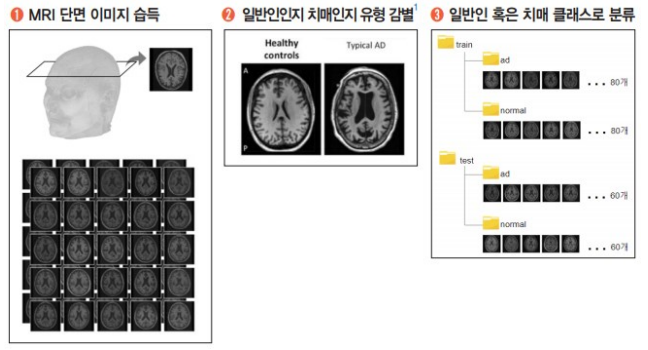
총 280장으로 이루어진 뇌 단면 사진<br>
치매 환자의 특성으로 보이는 뇌 사진 140장 + 일반인 뇌 사진 140장<br>
280개의 이미지 중 160개는 train폴더에, 120개는 test 폴더에<br>
치매 환자의 뇌는 ad, 일반인 뇌 사진 normal<br>

##### ImageDataGenerator() 함수
- 주어진 데이터를 이용해 변형된 이미지를 만들어 학습셋에 포함시키는 편리한 기능을 제공
- 이미지 데이터의 수를 확장할 때 효과적으로 사용할 수 있음
    - rescale: 주어진 이미지의 크기를 바꾸어 줌
    - horizontal_flip, vertical_flip: 주어진 이미지를 수평 또는 수직으로 뒤집음
    - zoom_range: 정해진 범위 안에서 축소 또는 확대
    - width_shift_range, height_shift_range: 정해진 범위 안에서 그림을 수평 또는
        수직으로 랜덤하게 평행 이동시킴
    - rotation_range: 정해진 각도만큼 이미지를 회전시킴
    - shear_range: 좌표 하나를 고정시키고 다른 몇 개의 좌표를 이동시키는 변환
    - fill_mode: 이미지를 축소 또는 회전하거나 이동할 때 생기는 빈 공간을 어떻게 채울지 결정
    - nearest 옵션을 선택하면 가장 비슷한 색으로 채워짐
    
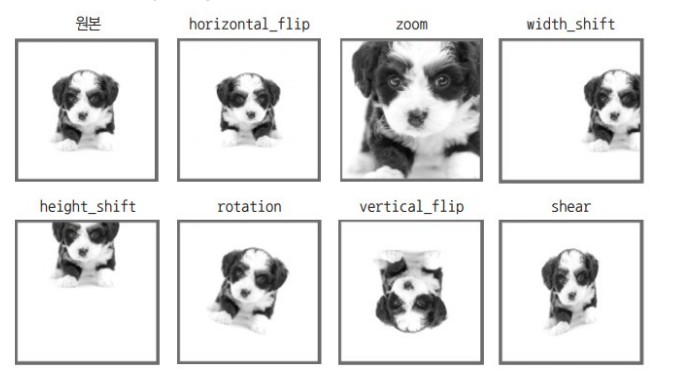

- 이 인자를 모두 적용하면 오히려 학습시간이 늘어남 -> 데이터 특성에 맞게 사용하는 것이 좋음
- 데이터 부풀리기는 학습셋에만 적용하는 게 좋음
- 테스트셋은 실제 정보를 그대로 유지하게 하는 편이 과적합의 위험을 줄일 수 있음
    - 테스트셋은 정규화만<br>
    test_datagen = ImageDataGenerator(rescale=1./255)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

#학습셋의 변형을 설정하는 부분입니다. 
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )      

train_generator = train_datagen.flow_from_directory(
       './data/train',   # 학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# 테스트셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       './data/test',   # 테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')


# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './data/train'

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. 전이 학습으로 모델 성능 극대화하기
이미지넷 : 1000가지 종류로 나뉜 120만 개가 넘는 이미지를 놓고 어떤 물체인지 맞히는 '이미지넷 이미지 인식 대회(ILSVRC)'에 사용되는 데이터셋

#### 전이학습
- 방대한 양의 데이터셋에서 추출한 정보를 가져와서 예측률을 극대화하는 학습
- 기존의 학습 결과를 가져와서 유사한 프로젝트에 사용하는 방법
- 뇌 사진만 다루는 치매 분류기를 만들 때, 뇌 사진과 관련 없는 수백만 장의 이미지넷 학습 정보가 큰 역할을 하는 이유는 ***형태***를 구분하는 기본적인 학습이 되어 있기 때문
- 딥러닝은 학습이 시작되면 어떤 픽셀의 조합이 '선'이고 어떤 형태의 그룹이 '면'이 되는지부터 파악해야 함
- 아무런 정보도 없이 MRI 사진 판별을 시작하면 이런 기본적인 정보를 얻어내는 데도 많은 시간을 쓰게 되는데, 이런 문제는 전이 학습이 해결해줌
- 대량의 데이터를 이용해 학습한 가중치 정보를 가져와 내 모델에 적용한 후 프로젝트를 계속해서 진행할 수 있게 함


#### 전이 학습을 적용하는 방법

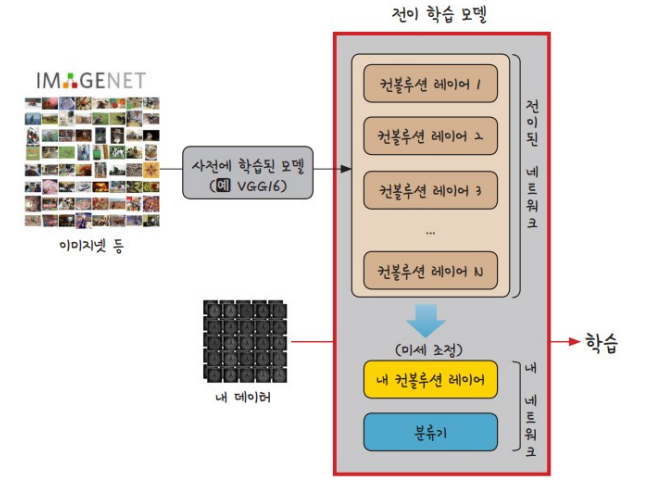
- 대규모 데이터셋에서 학습된 기존의 네트워크를 불러옴
- CNN 모델의 앞쪽을 이 네트워크로 채움
- 뒤쪽 레이어에서 내 프로젝트와 연결
- 이 두 네트워크가 잘 맞물리게끔 미세 조정(fine tuning)을 하면 됨


##### 실행이 너무 오래 걸려 해당 코드는 코랩으로 돌렸음

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# 학습셋의 변형을 설정하는 부분입니다. 
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,      # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )      


train_generator = train_datagen.flow_from_directory(
       './data/train',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# 테스트셋의 정규화를 설정합니다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       './data/test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

# VGG16 모델을 불러옵니다.
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

# 우리의 모델을 설정합니다.
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

In [ ]:
# 모델의 실행 옵션을 설정합니다. 
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = finetune_model.fit(
       train_generator,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10, 
       callbacks=[early_stopping_callback])

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()